cl = conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, 0.05) = -3.246993802754611
p0 = pvalue_Δμ_le_δ(x̄, ȳ, m, n, σ, 0) = 0.34926767915166934
cl0 = conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, p0) = 0.0


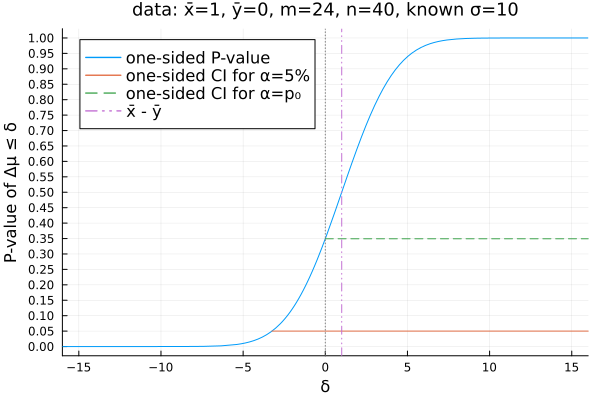

In [1]:
using Distributions
using StatsPlots
default(fmt=:png, legendfontsize=11, titlefontsize=12)

function pvalue_Δμ_le_δ(x̄, ȳ, m, n, σ, δ)
    z = (x̄ - ȳ - δ) / (σ * √(1/m + 1/n))
    ccdf(Normal(), z)
end

function conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, α)
    c = quantile(Normal(), 1-α)
    x̄ - ȳ - c * σ * √(1/m + 1/n)
end

function plot_result_Δμ_le_δ(x̄, ȳ, m, n, σ, a, b)
    @show cl = conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, 0.05)
    @show p0 = pvalue_Δμ_le_δ(x̄, ȳ, m, n, σ, 0)
    @show cl0 = conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, p0)
    plot(δ -> pvalue_Δμ_le_δ(x̄, ȳ, m, n, σ, δ), a, b; label="one-sided P-value")
    plot!([cl, b], fill(0.05, 2); ls=:solid, label="one-sided CI for α=5%")
    plot!([cl0, b], fill(p0, 2); ls=:dash, label="one-sided CI for α=p₀")
    vline!([x̄-ȳ]; ls=:dashdotdot, label="x̄ - ȳ")
    vline!([0]; ls=:dot, c=:gray, label="")
    plot!(xguide="δ", yguide="P-value of Δμ ≤ δ")
    plot!(ytick=0:0.05:1)
    plot!(xlim=(a, b))
    title!("data: x̄=$x̄, ȳ=$ȳ, m=$m, n=$n, known σ=$σ")
end

plot_result_Δμ_le_δ(1, 0, 24, 40, 10, -16, 16)

cl = conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, 0.05) = 0.753006197245389
p0 = pvalue_Δμ_le_δ(x̄, ȳ, m, n, σ, 0) = 0.026403755708056788
cl0 = conflim_Δμ_le_δ(x̄, ȳ, m, n, σ, p0) = -1.1546319456101628e-14


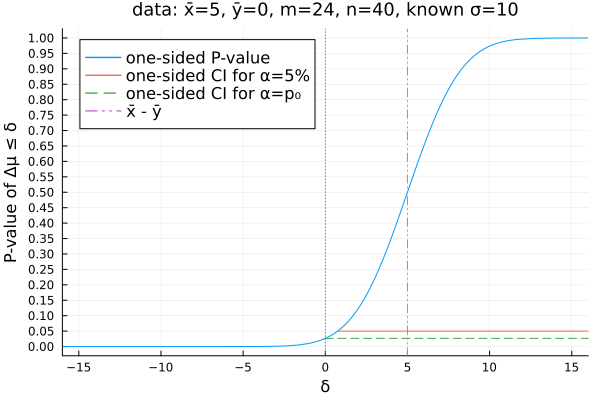

In [2]:
plot_result_Δμ_le_δ(5, 0, 24, 40, 10, -16, 16)

(L, U) = confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, 0.05) = (-4.060605247526649, 6.060605247526649)
p0 = pvalue_Δμ_eq_δ(x̄, ȳ, m, n, σ, 0) = 0.6985353583033387
(L0, U0) = confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, p0) = (0.0, 2.0)


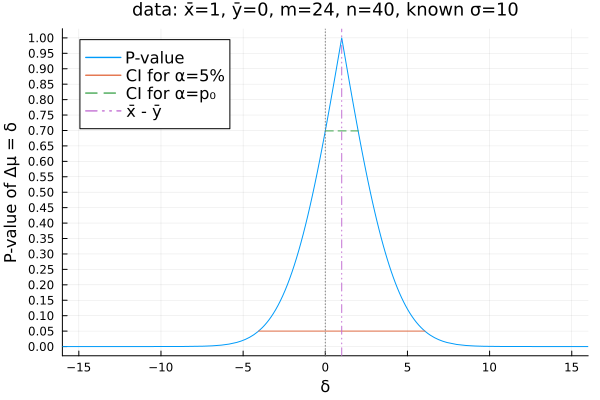

In [3]:
using Distributions
using StatsPlots
default(fmt=:png, legendfontsize=11, titlefontsize=12)

function pvalue_Δμ_eq_δ(x̄, ȳ, m, n, σ, δ)
    z = (x̄ - ȳ - δ) / (σ * √(1/m + 1/n))
    2ccdf(Normal(), abs(z))
end

function confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, α)
    c = quantile(Normal(), 1-α/2)
    x̄ - ȳ - c * σ * √(1/m + 1/n), x̄ - ȳ + c * σ * √(1/m + 1/n)
end

function plot_result_Δμ_eq_δ(x̄, ȳ, m, n, σ, a, b; kwargs...)
    @show L, U = confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, 0.05)
    @show p0 = pvalue_Δμ_eq_δ(x̄, ȳ, m, n, σ, 0)
    @show L0, U0 = confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, p0)
    plot(δ -> pvalue_Δμ_eq_δ(x̄, ȳ, m, n, σ, δ), a, b; label="P-value")
    plot!([L, U], fill(0.05, 2); ls=:solid, label="CI for α=5%")
    plot!([L0, U0], fill(p0, 2); ls=:dash, label="CI for α=p₀")
    vline!([x̄-ȳ]; ls=:dashdotdot, label="x̄ - ȳ")
    vline!([0]; ls=:dot, c=:gray, label="")
    plot!(xguide="δ", yguide="P-value of Δμ = δ")
    plot!(ytick=0:0.05:1)
    plot!(xlim=(a, b))
    title!("data: x̄=$x̄, ȳ=$ȳ, m=$m, n=$n, known σ=$σ")
    plot!(; kwargs...)
end

plot_result_Δμ_eq_δ(1, 0, 24, 40, 10, -16, 16; legend=:topleft)

(L, U) = confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, 0.05) = (0.43939475247335125, 10.560605247526649)
p0 = pvalue_Δμ_eq_δ(x̄, ȳ, m, n, σ, 0) = 0.03315998745884772
(L0, U0) = confint_Δμ_eq_δ(x̄, ȳ, m, n, σ, p0) = (-1.2434497875801753e-14, 11.000000000000012)


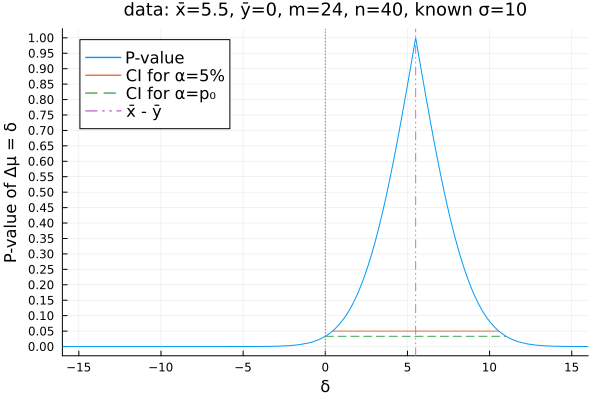

In [4]:
plot_result_Δμ_eq_δ(5.5, 0, 24, 40, 10, -16, 16; legend=:topleft)